In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.drop(columns=['Name', "PassengerId"], inplace=True)
df.dropna(inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [5]:
# Separate predictors and target variable
X = df.drop(columns=['Survived'])  # Predictors
y = df['Survived']  # Target variable

In [6]:
X = pd.get_dummies(X)
X = X.astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,1,38,1,0,71,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,35,1,0,53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,54,0,0,51,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,3,4,1,1,16,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,1,58,0,0,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform RFE (Recursive Feature Elimination) to select top features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)  # Selecting top 10 features, adjust as needed
rfe = rfe.fit(X_scaled, y)

# List the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Age', 'Sex_female', 'Sex_male', 'Ticket_113760', 'Ticket_113781',
       'Ticket_347054', 'Ticket_PC 17572', 'Cabin_C49', 'Cabin_E24',
       'Cabin_E77'],
      dtype='object')


In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, rfe.support_], y, test_size=0.3, random_state=42)

In [9]:
# Step 4: Model Training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Step 5: Model Evaluation
y_pred = logistic_model.predict(X_test)


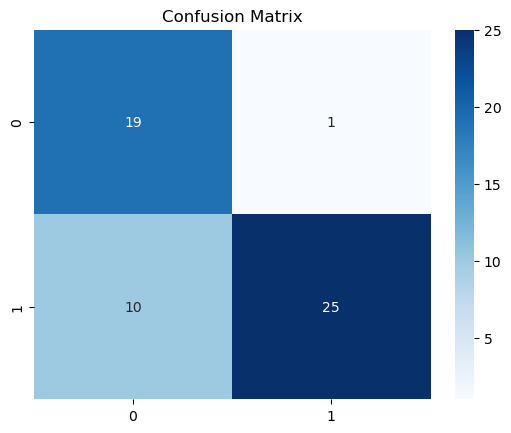

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8
Precision: 0.9615384615384616
Recall: 0.7142857142857143
F1-Score: 0.819672131147541


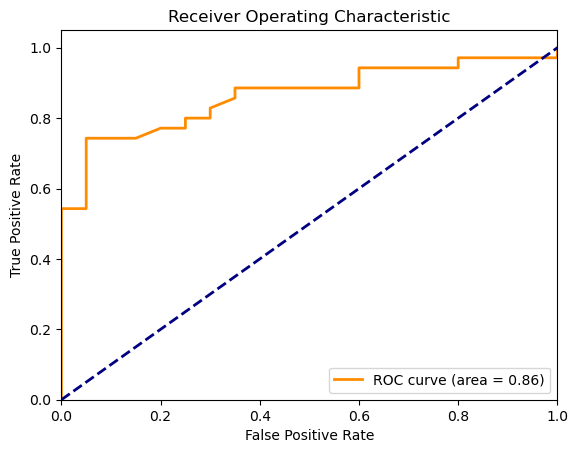

In [13]:
# ROC Curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Step 6: Hyperparameter Tuning (Optional)
# Example of grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

grid_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_model.fit(X_train, y_train)

print(f"Best parameters: {grid_model.best_params_}")
print(f"Best cross-validation score: {grid_model.best_score_}")


Best parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.7966153846153846


In [15]:
# Use the best model to predict
best_model = grid_model.best_estimator_
y_pred_best = best_model.predict(X_test)

# Re-evaluate the model with best parameters
cm_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Accuracy (Best Model): {accuracy_best}")
print(f"Precision (Best Model): {precision_best}")
print(f"Recall (Best Model): {recall_best}")
print(f"F1-Score (Best Model): {f1_best}")

Accuracy (Best Model): 0.8
Precision (Best Model): 0.9615384615384616
Recall (Best Model): 0.7142857142857143
F1-Score (Best Model): 0.819672131147541


In [16]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred_best, target_names=['0', '1'])
print(report)


              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.96      0.71      0.82        35

    accuracy                           0.80        55
   macro avg       0.81      0.83      0.80        55
weighted avg       0.85      0.80      0.80        55

